![banner-pdi](https://user-images.githubusercontent.com/58775072/141189378-b5df3287-e8c0-48a1-ad11-825ba317463b.png)

## Universidade Federal de Campina Grande (UFCG)
## Centro de Engenharia Elétrica e Informática (CEEI) 
## Disciplina: Int. ao Processamento de Imagem Digital e Visão Computacional
## Professora: Luciana Ribeiro Veloso
## Aluno(a): José Ewerton Cordeiro e Cordeiro

## Observações
***

1. Os arquivos de laboratório devem ser salvos seguindo o seguinte padrão: `lab-x-nome-sobrenome.ipynb`.
2. Não esqueça de colocar o seu nome no cabeçalho acima.
3. Não altere a ordem das células e realize as implementações somente nos campos específicados.  
4. Ao longo do laboratório será solicitado perguntas teóricas relativas aos assuntos das aulas da disciplina e implementações de código utilizando a linguagem de programação Python. 
5. As células de implementação com código serão indicadas pelos seguintes comentários: `# IMPLEMENTE O SEU CÓDIGO AQUI`.
6. Para editar uma célula de texto, basta clicar duas vezes com o cursos do mouse para editar, e `Ctrl + Enter` para finalizar a edição. 
7. Para rodar as células com os códigos desenvolvidos, digite `Ctrl + Enter` ou clique em `Run` no menu do Jupyter.
8. Dúvidas, problemas de execução de código ou dificuldades com a linguagem de programação Python devem ser feitas durante as aulas de laboratório, encaminhadas para o grupo de WhatsApp da turma ou fórum do PVAE da disciplina.
9. Os laboratórios devem ser enviados nos campos especificados pelo PVAE. ATENTE-SE AOS PRAZOS DE ENTREGA!

# <span style="color:red">Laboratório 7.1: Classificação de Dígitos com Redes Neurais Artificiais</span>
***

### Importação dos Pacotes

In [ ]:
import os                                              # operational system para manipulação de arquivos.
import cv2                                             # openCV para manipulação de imagens.
import numpy as np                                     # numpy para manipulação de matrizes e arrays.
import matplotlib.pyplot as plt                        # pyplot para plotagem de gráficos e imagens.
from sklearn.model_selection import train_test_split   # função para particionamento dos dados
from tensorflow.keras.models import Sequential         # classe de modelos sequenciais para construir as redes neurais.
from tensorflow.keras.layers import Dense, Input       # camada de neurônios densamente conectados.
from tensorflow.keras.optimizers import Adam           # otimizador "Descida do Gradiente com Momento".
from tensorflow.keras.utils import to_categorical      # função para preprocessamento dos gabaritos.
from tensorflow.keras.callbacks import ModelCheckpoint # callback que salva o modelo durante o treinamento
from tensorflow.keras.datasets import mnist            # dataset utilizado nesse experimento.

### Banco de Dados

* Vamos utilizar o MNIST, outro banco de dados presente no catálogo de datasets do Keras, que é disponibilizado como uma função pronta;

* Cada instância do banco de dados corresponde a uma imagem rotulada de um dígito manuscrito;

* As imagens do banco de dados são monocromáticas e de dimensões 28 x 28;

* Os gabaritos correspondem ao número manuscrito, sendo um inteiro entre 0 e 9;

* O banco de dados contém 60.000 imagens para treino e 10.000 imagens para teste;

### Organização do banco de dados

* Como vimos, a primeira dimensão dos arrays do banco de dados é reservada para controlar a amostra e as demais correspondem às demais dimensões do tipo de dados utilizado. 

* Nesse caso, os nossos dados são imagens monocromáticas (2D), de modo que são organizados em tensores tridimensionais (3D) com formato: **dados.shape = (amostras, altura, largura)**
    * O i-ésimo exemplo pode ser acessado a partir de: **exemplo = dados[i]**
    * Um pedaço de uma imagem pode ser acessado de forma similar:
        * Quadrante superior esquerdo da i-ésima imagem: **quad = dados[i, :14, :14]**
        

* O banco de dados pode ser carregado utilizando:
    * **(train_data, train_targets), (test_data, test_targets) = mnist.load_data()**
    * train_data é um tensor com as entradas do conjunto de treino;
    * test_data é um tensor com as entradas do conjunto de teste;
    * train_targets é um tensor com os gabaritos do conjunto de treino;
    * test_targets é um tensor com os gabaritos do conjunto de teste;

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## <span style='color:blue'>Questão 1: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>

* O código abaixo plota alguns exemplos aleatórios do banco de dados e verifica algumas das suas propriedades.
    * (a) Verifique alguns exemplos do banco de dados e suas propriedades.
    * (b) O quão semelhantes as amostras de um mesmo dígito são entre si?
    * (c) Os gabaritos estão sempre de acordo com as imagens?
    * (d) Desenvolver um algoritmo baseado em PDI para classificar esses dígitos seria uma tarefa simples? Quais seriam as principais dificuldades?

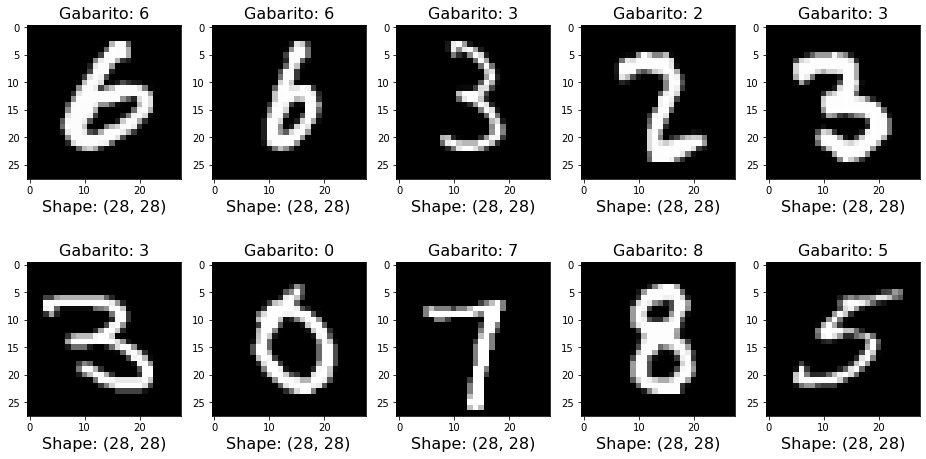

In [ ]:
# escolhe exemplos aleatórios
indices = np.random.randint(0, 60000 - 1, 10)
#indices = [0, 100, 6810, 20, 36, 1456, 8456, 1245, 9785, 6574] #valores digitados aleatoriamente para verificar os exemplos da letra (a)

# plots
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize=(16, 8))

for i, idx in enumerate(indices):
    
    # plota a imagem
    axs[i // 5][i % 5].imshow( train_images[idx], vmin = 0, vmax = 255, cmap = "gray")
    
    # adiciona o gabarito como título
    axs[i // 5][i % 5].set_title( "Gabarito: {}".format(train_labels[idx]), fontsize = 16)
    
    # adiciona o shape como subtítulo
    axs[i // 5][i % 5].set_xlabel( "Shape: {}".format(train_images[idx].shape), fontsize = 16)

## <span style='color:green'>Respostas da Questão 1:</span>

* (a) Adicione sua reposta aqui.  
* (b) As caligrafias dos digitos são bem semelhantes, parece que os números foram escritas pela mesma pessoa, ou por duas pessoas com a mesma caligrafia.
* (c) Foram verificados varios valores, todos verificados possuem o gabarito correspondente a imagem
* (d) Para mim não seria uma tarefa tão simples, mas acho que uma pessoa que tem um certo dominio na área pode conseguir isso de forma simples. As principais dificuldades que eu noto são na hora de de utilizar as imagens como parametros de entrada de uma rede neural.

## <span style='color:blue'>Questão 2: [Valor da Questão: 1.0][Taxa de acerto: x.x]</span>

* Utilize a função np.unique() para verificar os possíveis gabaritos em train_labels e test_labels.

    * https://numpy.org/doc/stable/reference/generated/numpy.unique.html

In [ ]:
train_unique = np.unique(train_labels)
test_unique = np.unique(test_labels)
print("Possiveis gabaritos em train_label", train_unique)
print("Possiveis gabaritos em test_label", test_unique)

Possiveis gabaritos em train_label [0 1 2 3 4 5 6 7 8 9]
Possiveis gabaritos em test_label [0 1 2 3 4 5 6 7 8 9]


### Pre-processamento dos dados de entrada

* Como estamos utilizando Redes Neurais Artificiais não podemos utilizar as imagens em formato de matriz, precisamos que a entrada seja seja um vetor de características.

* Para isso, podemos utilizar a função **reshape(shape)** que reorganiza um array para um determinado formato especificado desde que seja possível alocar todos os valores do array original para o novo formato.

* Além disso, como em uma imagem todos os pixels são valores entre 0 e 255, podemos pre-processar os dados de entrada a partir de uma simples divisão por 255, que garante que todos os dados estarão entre 0 e 1.

In [ ]:
def preprocess_data(data):
    
    # desfaz a matriz da imagem e reorganiza os dados como um vetor
    data = data.reshape((len(data), 28 * 28))
    # normaliza os valores ao dividir pelo maior valor possível dentro das imagens.
    data = data.astype("float32") / 255
    return data

train_vectors = preprocess_data(train_images)
test_vectors  = preprocess_data(test_images)

## <span style='color:blue'>Questão 3: [Valor da Questão: 1.0][Taxa de acerto: x.x]</span>

* Verifique as dimensões e a faixa de valores dos dados de treino e teste após o pré-processamento. Não é necessário verificar a faixa de valores para cada característica isoladamente.

In [ ]:
train_shape = train_vectors.shape
test_shape = test_vectors.shape

print("dimensão dos dados de treino:", train_shape)
print("dimensão dos dados de teste:", test_shape)

print("Dados de teste:")
for i in range(0,10):
  print()

dimensão dos dados de treino: (60000, 784)
dimensão dos dados de teste: (10000, 784)


### Particionamento dos dados de treino

* Agora vamos criar uma partição de validação a partir do conjunto de treino para realizar uma validação cruzada. 

* Novamente vamos utilizar a função **train_test_split**, que separa dados e os seus respectivos gabaritos segundo uma fração especificada.

* Contudo, dessa vez utilizaremos o parâmetro **stratify**, que indica os rótulos associados aos dados fornecidos. Quando esse parâmetro é fornecido a função realiza o particionamento dos dados e mantém a proporção entre exemplos de uma mesma classe com relação aos dados originais.

## <span style='color:blue'>Questão 4: [Valor da Questão: 1.0][Taxa de acerto: x.x]</span>

* O código abaixo mostra a distribuição dos dados em um conjunto de gabaritos. Comente o que cada linha do programa faz.

In [ ]:
# COMENTE AS LINHAS DE CÓDIGO AQUI --> QUESTÃO 4

def print_label_percentage(labels):
    #utilizando a função unique para determinar os possiveis gabaritos e a quantidade de vezes que esses gabaritos aparecem
    unique, counts = np.unique(labels, return_counts = True)
    #um for loop para percorrer todos os valores do gabaritos
    for u, c in zip(unique, counts):
      #informa o valor do gabarito e a quantidade de vezes que cada um desses gabaritos aparecem, além de informar a porcentagem desses gabaritos no valor total.
        print( "\tGabarito {}: {} ({:.2f}%)".format( u, c, 100 * c / labels.shape[0]))
    return

print("Treino:")
#chamando a função
print_label_percentage(train_labels)

Treino:
	Gabarito 0: 5923 (9.87%)
	Gabarito 1: 6742 (11.24%)
	Gabarito 2: 5958 (9.93%)
	Gabarito 3: 6131 (10.22%)
	Gabarito 4: 5842 (9.74%)
	Gabarito 5: 5421 (9.04%)
	Gabarito 6: 5918 (9.86%)
	Gabarito 7: 6265 (10.44%)
	Gabarito 8: 5851 (9.75%)
	Gabarito 9: 5949 (9.91%)


## <span style='color:blue'>Questão 5: [Valor da Questão: 1.0][Taxa de acerto: x.x]</span>

* As classes do banco de dados são balanceadas? O train_test_split conseguiu manter as mesmas proporções entre as classes que os dados originais?

In [ ]:
# fração escolhida para separar o mesmo número de instâncias do conjunto de testes
data_frac = test_vectors.shape[0] / train_vectors.shape[0]

# criação do conjunto de validação
train_vectors, val_vectors, train_labels, val_labels = train_test_split(train_vectors,           # dados de treino
                                                                        train_labels,            # gabaritos de treino
                                                                        test_size = data_frac,   # proporção de dados p/ validação
                                                                        stratify = train_labels, # dados de referência
                                                                        random_state = 42)        # semente de geração

print("Treino:", train_vectors.shape, train_labels.shape)
print_label_percentage( train_labels )

print("\n\n")
print("Validação:", val_vectors.shape, val_labels.shape)
print_label_percentage( val_labels )

Treino: (50000, 784) (50000,)
	Gabarito 0: 4936 (9.87%)
	Gabarito 1: 5618 (11.24%)
	Gabarito 2: 4965 (9.93%)
	Gabarito 3: 5109 (10.22%)
	Gabarito 4: 4868 (9.74%)
	Gabarito 5: 4518 (9.04%)
	Gabarito 6: 4932 (9.86%)
	Gabarito 7: 5221 (10.44%)
	Gabarito 8: 4876 (9.75%)
	Gabarito 9: 4957 (9.91%)



Validação: (10000, 784) (10000,)
	Gabarito 0: 987 (9.87%)
	Gabarito 1: 1124 (11.24%)
	Gabarito 2: 993 (9.93%)
	Gabarito 3: 1022 (10.22%)
	Gabarito 4: 974 (9.74%)
	Gabarito 5: 903 (9.03%)
	Gabarito 6: 986 (9.86%)
	Gabarito 7: 1044 (10.44%)
	Gabarito 8: 975 (9.75%)
	Gabarito 9: 992 (9.92%)


## <span style="color:green">Resposta da Questão 5:</span>

* Sim a classe ficou bem dividida e bem balanceada. A unica diferença na proporção foi 0,01% a menos no gabarito 5 e 0,01% a mais no gabarito 9, mas como se trata de uma porcentagem tão pequena não levamos em consideração.

### Pre-processamento dos gabaritos

* Nesse caso temos um problema multiclasse com 10 classes, sendo elas correspondentes aos números entre 0 e 9. Consequentemente, o modelo produzido terá 10 unidades de saída, uma para cada classe, e utilizará a função de ativação softmax.

* Para fornecer esses gabaritos para a rede durante o treinamento é necessário categorizar as saídas, para limitá-las ao intervalo [0, 1]. Para isso vamos utilizar a função to_categorical() disponível no próprio Keras.

In [ ]:
categorical_train_labels = to_categorical(train_labels)
categorical_val_labels = to_categorical(val_labels)
categorical_test_labels = to_categorical(test_labels)

## <span style='color:blue'>Questão 6: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>

* O código abaixo mostra alguns exemplos da transformação realizada pela função to_categorical(). Analise os exemplos e explique, o que a função faz?.

In [ ]:
# escolhe exemplos aleatórios
indices = np.random.randint(0, categorical_train_labels.shape[0]-1, 10)

# printa exemplos selecionados
for i, idx in enumerate(indices):
    categorical_example = categorical_train_labels[idx]
    non_categorical_example = train_labels[idx]
    print("{} -> {}".format(non_categorical_example, categorical_example))

9 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
4 -> [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
2 -> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
1 -> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
7 -> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
1 -> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
5 -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
7 -> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
5 -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
0 -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## <span style="color:green">Resposta da Questão 6:</span>

* Analisando o código, a função verifica quais são os possíveis gabaritos, no caso são os valores de 0 a 9, e cria um vetor o tamanho equivalente a quantidade dos gabaritos, logo após ele define como 1 a posição relativa ao gabarito e 0 os demais valores. No caso atual existem 10 valores, definidos de 0 a 9, então é criado um vetor com size 10, logo após essa definição é verificado o gabarito, a depender desse gabarito é colocado o valor 1 no valor correspondente, o valor 1 recebe 1 na posição 2, o valor 5 recebe 1 na posição 6 e assim por diante. Esse processo é realizado para todos os gabaritos presentes.

### Construindo o modelo

Para construir o modelo usaremos a classe **Sequential**, que possibilita a construção de modelos sequenciais de forma bastante simples.
* A construção do modelo é feita a partir do seu instanciamento como objeto da classe seguido de chamadas à função **add()** para adicionar camadas.
* Como estamos construindo apenas Redes Neurais Artificiais por enquanto, vamos utilizar apenas as camadas **Dense** e **Input**.
    * A camada Input cria a entrada da rede com **Input( shape )**
        * shape corresponde ao formato do tensor de entrada, no nosso caso será o número de características do nosso banco de dados (13);
    * A camada Dense pode ser chamada com **Dense( n_unidades, activation = 'linear' )**
        * n_unidades corresponde ao número de neurônios da camada;
        * activation corresponde à função de ativação utilizada na camada;
* Algumas funções de ativação disponíveis são:
    * "linear"
    * "relu"
    * "sigmoid"
    * "softmax"
    * "tanh"


* Mais informações sobre a camada dense podem ser vistas em **https://keras.io/api/layers/core_layers/dense/**
* Mais informações sobre as ativações disponíveis podem ser vistas em **https://keras.io/api/layers/activations/**

## <span style='color:blue'>Questão 7: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>

* Nesse caso utilizamos uma saída com ativação "softmax". Por que usamos essa ativação e não algo como a ativação sigmóide?

In [ ]:
def build_model( n_inputs, n_outputs ):
    
    rede = Sequential()
    rede.add( Input( (n_inputs, ) ) )
    rede.add( Dense(  128, activation = "relu") )
    rede.add( Dense(  256, activation = "relu") )
    rede.add( Dense( n_outputs, activation = "softmax" ) )
    return rede

model = build_model( 28*28, 10 )
model.compile( optimizer = Adam( learning_rate = 5e-4 ), 
               loss="categorical_crossentropy", 
               metrics=["acc"])
model.summary()
#vir aqui

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


* Dessa vez utilizaremos uma das callbacks do Keras, o Model_Checkpoint.
* Essa função salva o modelo conforme o treinamento é executado à medida que os valores da variável monitorada melhoram, preservando sempre o modelo com os melhores valores obtidos.
* model_checkpoint = ModelCheckpoint( path, monitor = None, save_best_only = True, verbose = 1)
    * path é o caminho para o salvamento do modelo;
    * monitor é a variável que deve ser monitorada pelo callback;
    * save_best_only indica se só o melhor modelo deve ser salvo ou se todos os aumentos devem ser salvos;
    * verbose é o modo de texto, 1 indica para que o Keras avise quando um novo modelo for salvo;

In [ ]:
model_checkpoint = ModelCheckpoint("model.h5", monitor = "val_acc", save_best_only = True, verbose = 1)

## <span style="color:green">Resposta da Questão 7:</span>

* A função sigmoid tem sua utilidade apenas para saidas com numeros positivos, porém a função softmax possui uma eficiência para classificar saidas probabilisticas, por isso foi-se usada a função de ativação softmax

### Treinando o modelo

O treinamento é realizado a partir da função **fit**, que recebe dados de treino e de validação além de hiperparâmetros como o número de épocas e o tamanho dos lotes de dados (batchsize).

* **hist = model.fit( x = None, y = None, epochs = 1, batchsize = None, callbacks = [], validation_data = None, verbose = "auto")**
    * x corresponde aos dados de treino;
    * y corresponde aos gabaritos de treino;
    * epochs corresponde ao número de épocas de treinamento;
    * batchsize corresponde ao tamanho dos lotes entregues à rede de cada vez;
    * callbacks corresponde à lista de callbacks utilizada;
    * validation_data corresponde a uma tupla ( val_data, val_targets ) com os dados de validação;
    * verbose indica como a função deve reportar os resultados:
        * 0: modo silencioso, nenhum retorno em formato de texto;
        * 1: retorno a cada época e barra de progresso;
        * 2: retorno a cada época sem barra de progresso;
    * hist é um dicionário de retorno com os valores de loss e das métricas computadas para treino e validação;
    
    
    
* Lista de callbacks disponíveis: https://keras.io/api/callbacks/

In [ ]:
history = model.fit( train_vectors, categorical_train_labels, epochs = 10, batch_size = 128, callbacks = [model_checkpoint], 
                    validation_data = (val_vectors, categorical_val_labels))
history_dict = history.history

Epoch 1/10
391/391 [==============================] - ETA: 0s - loss: 0.4278 - acc: 0.8841
Epoch 1: val_acc improved from -inf to 0.93910, saving model to model.h5
391/391 [==============================] - 5s 11ms/step - loss: 0.4278 - acc: 0.8841 - val_loss: 0.2155 - val_acc: 0.9391
Epoch 2/10
388/391 [============================>.] - ETA: 0s - loss: 0.1766 - acc: 0.9490
Epoch 2: val_acc improved from 0.93910 to 0.95250, saving model to model.h5
391/391 [==============================] - 3s 6ms/step - loss: 0.1766 - acc: 0.9490 - val_loss: 0.1669 - val_acc: 0.9525
Epoch 3/10
382/391 [============================>.] - ETA: 0s - loss: 0.1276 - acc: 0.9622
Epoch 3: val_acc improved from 0.95250 to 0.95990, saving model to model.h5
391/391 [==============================] - 1s 3ms/step - loss: 0.1271 - acc: 0.9624 - val_loss: 0.1420 - val_acc: 0.9599
Epoch 4/10
382/391 [============================>.] - ETA: 0s - loss: 0.0990 - acc: 0.9711
Epoch 4: val_acc improved from 0.95990 to 0.965

### Plotagens Gráficas

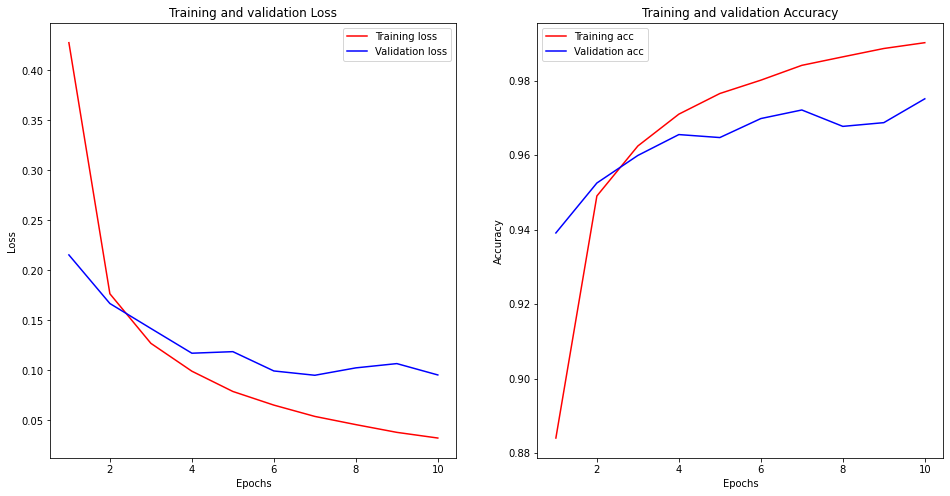

In [ ]:
fig, axes = plt.subplots(1, 2, squeeze = False, figsize = (16, 8))

# loss
train_loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

# epochs
epochs = range(1, len(train_loss_values) + 1)

# accuracy
train_acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

ax = axes.flat[0]
ax.plot(epochs, train_loss_values, "r", label = "Training loss")
ax.plot(epochs, val_loss_values, "b", label = "Validation loss")
ax.set_title("Training and validation Loss")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.legend()

ax = axes.flat[1]
ax.plot(epochs, train_acc_values, "r", label = "Training acc")
ax.plot(epochs, val_acc_values, "b", label = "Validation acc")
ax.set_title("Training and validation Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.legend()

### Testando o Modelo

O teste do modelo pode ser realizado a partir da função **evaluate**, que recebe os dados de treino e retorna o valor de loss calculado para esse conjunto e os valores de cada métrica da lista fornecida durante a compilação do modelo. 

* É uma prática comum realizar ajustes no modelo com base no conjunto de validação e só utilizar o conjunto de testes após a definição dos hiperparâmetros definitivos.
* Como os hiperparâmetros são ajustados a partir dos resultados obtidos para o conjunto de validação, o modelo pode acabar. sobreajustando aos dados de validação, então é interessante mudar os dados desse conjunto com frequência.
* Para mudar os dados de validação basta alterar a semente na função train_test_split.
* Crie um novo modelo do zero após a realização de mudanças nos conjuntos de treino/validação.

In [ ]:
test_loss, test_acc = model.evaluate(test_vectors, categorical_test_labels)

print("Test Accuracy:", 100*test_acc, "%")
print("Acertos: {} - Erros: {}".format(round(len(test_vectors)*test_acc), 
                                       round(len(test_vectors)*(1-test_acc) )))

313/313 [==============================] - 0s 1ms/step - loss: 0.0824 - acc: 0.9740
Test Accuracy: 97.39999771118164 %
Acertos: 9740 - Erros: 260


In [ ]:
model.load_weights('model.h5')

test_loss, test_acc = model.evaluate(test_vectors, categorical_test_labels)

print("Test Accuracy:", 100*test_acc, "%")
print("Acertos: {} - Erros: {}".format(round(len(test_vectors)*test_acc), 
                                       round(len(test_vectors)*(1-test_acc) )))

313/313 [==============================] - 0s 932us/step - loss: 0.0824 - acc: 0.9740
Test Accuracy: 97.39999771118164 %
Acertos: 9740 - Erros: 260


### Visualização dos Resultados

In [ ]:
def show_results(xtest, ytest, ypred, num = 25, tipo = "rand"):
    
    if tipo == "acertos":
        fltr_idx = [i for i in range(xtest.shape[0]) if ypred[i] == ytest[i]]
    else:
        fltr_idx = [i for i in range(xtest.shape[0]) if ypred[i] != ytest[i]]
        
    indices = np.random.choice(fltr_idx, min(num, len(fltr_idx)), replace = False)
       
    rows = int(num / 5)
    fig, axs = plt.subplots(nrows = rows, ncols = 5, figsize=(20, 4*rows))
    
    for i, idx in enumerate(indices):
        img = xtest[idx]
        if ypred[idx] == ytest[idx]:
            axs[i//5][i%5].set_title(str(ytest[idx]), color = "green", fontsize = 20)
        else:
            axs[i//5][i%5].set_title("Pred: {} - Gabarito: {}".format(ypred[idx], ytest[idx]), color = "red", fontsize = 20)
        
        axs[i//5][i%5].imshow(img, vmin=0, vmax=255, cmap = "gray")
    return

pred_labels = model.predict(test_vectors, verbose = 1)
preds = np.argmax(pred_labels, axis = -1)

313/313 [==============================] - 0s 911us/step


### Acertos do Modelo

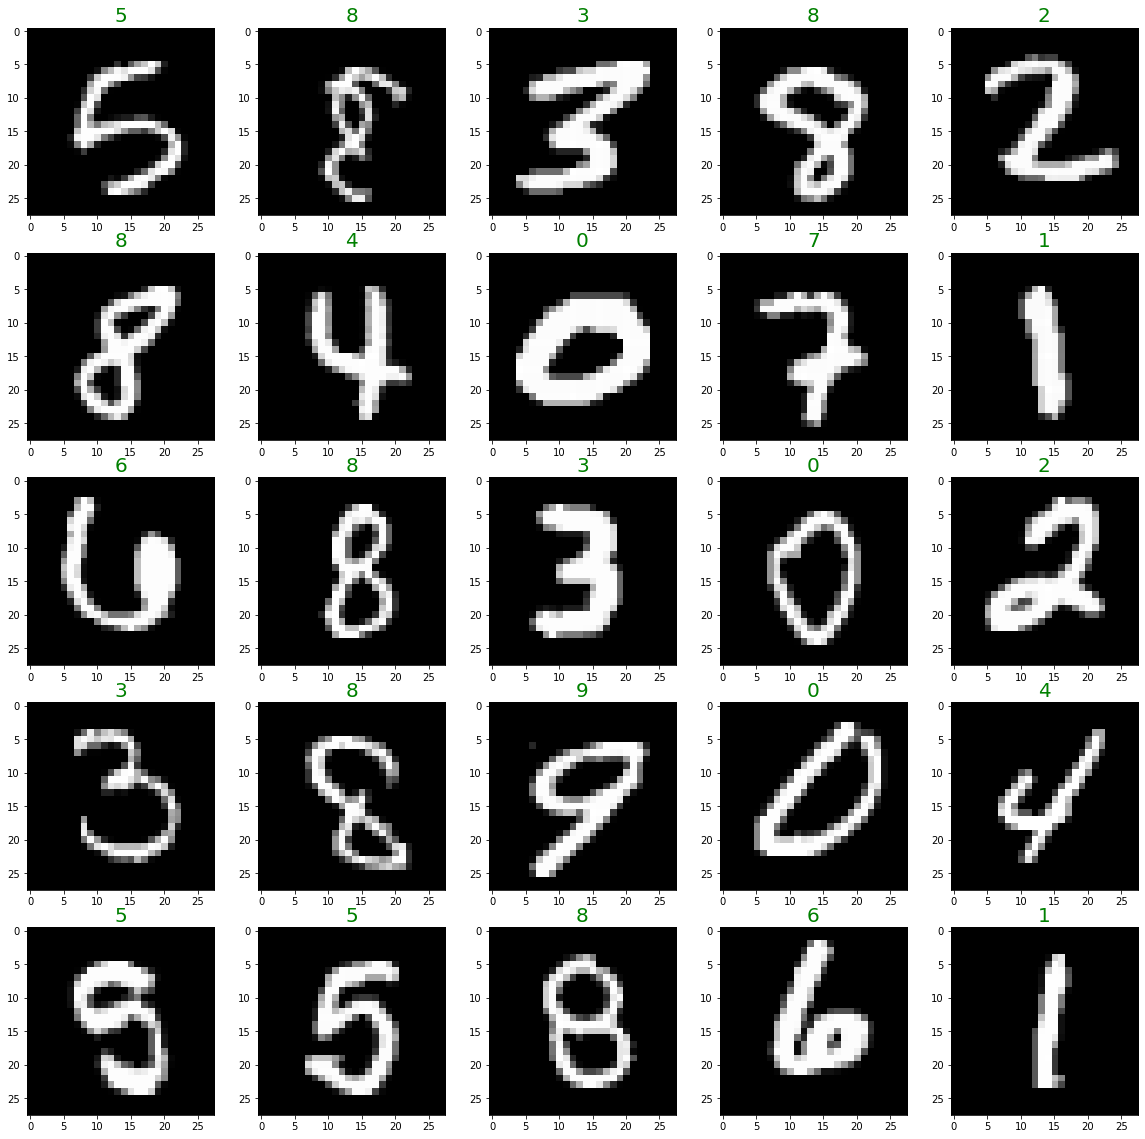

In [ ]:
show_results(test_images, test_labels, preds, tipo = "acertos")

### Erros do Modelo

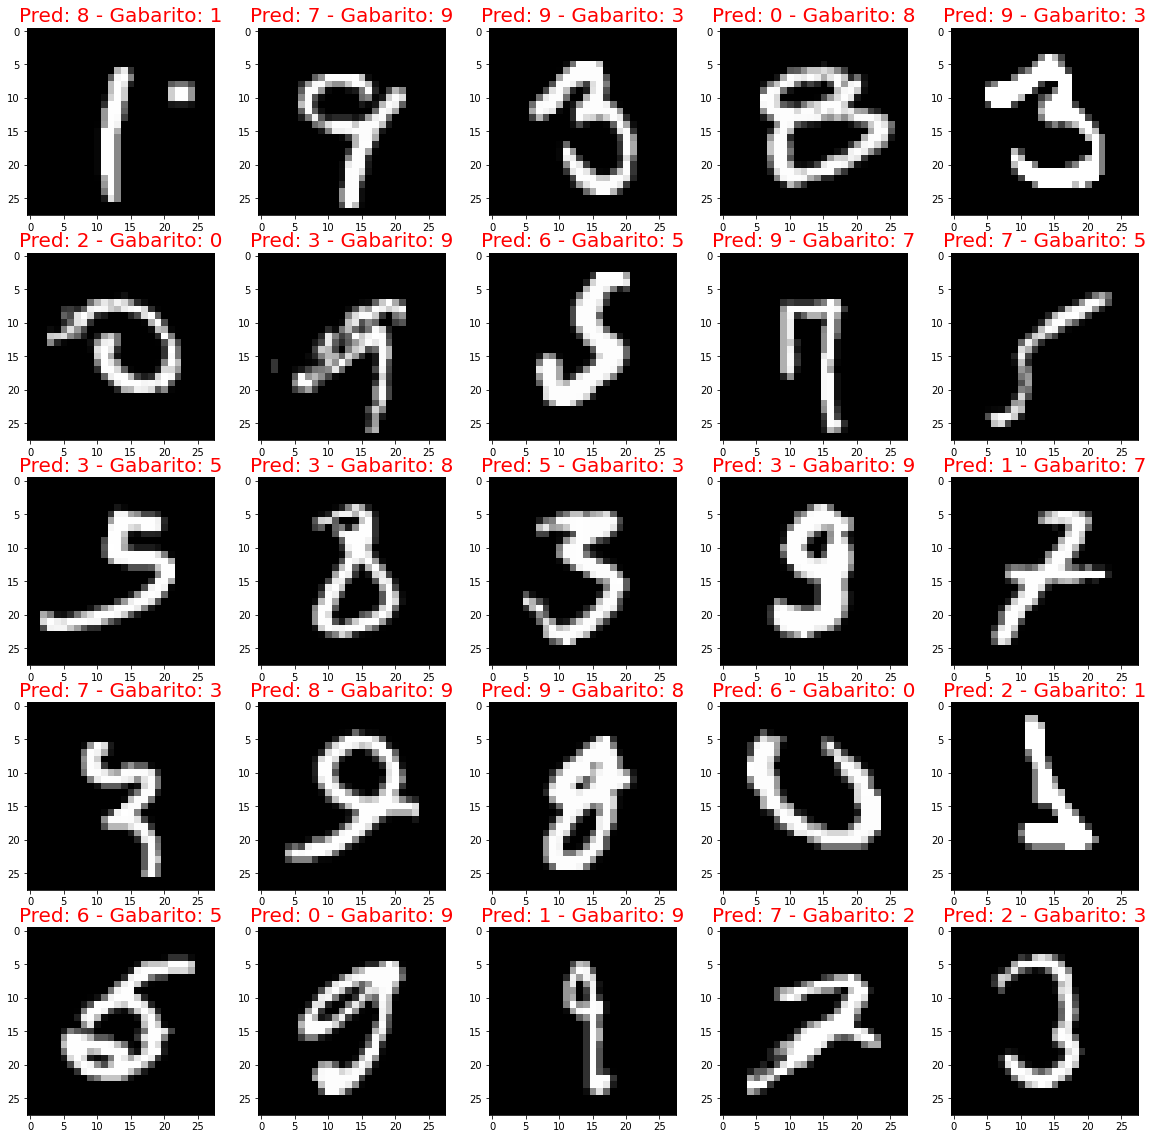

In [ ]:
show_results(test_images, test_labels, preds, tipo = "erros")

![gif4](https://user-images.githubusercontent.com/58775072/142712884-23841c4b-a01e-4d5b-b64a-5fe0cec5e8e7.gif)